# Dataset Reclamos + Arbolado lineal

#### En esta Notebook realizaremos un análisis exploratorio sobre el merge entre los datasets de Reclamos SUASI relacionados a problemas con árboles y el de Arbolado Lineal. Los reclamos corresponden a el año 2018 y parcial del 2019. 

**Importamos los diferentes paquetes a utilizar**

In [1]:
import numpy as np
import pandas as pd

#librerias graficos
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#librerias de machine learning
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Elimina warnings 
import warnings
warnings.filterwarnings("ignore")


**Seteos generales**

In [2]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 200)

**Cargamos el dataset que relaciona los reclamos y el arbolado lineal**

In [3]:
df_reclamos_con_arboles= pd.read_csv('reclamos_con_arboles.csv')

In [4]:
df_reclamos_con_arboles.shape

(47838, 40)

In [5]:
df_reclamos_con_arboles.sample(5)

Unnamed: 0     contacto  periodo                   categoria  \
8995         8995  00424922/18   201804  ARBOLADO Y ESPACIOS VERDES   
23629       23629  00929892/18   201808  ARBOLADO Y ESPACIOS VERDES   
7395         7395  00365107/18   201803  ARBOLADO Y ESPACIOS VERDES   
11852       11852  00515919/18   201805  ARBOLADO Y ESPACIOS VERDES   
21035       21035  00855044/18   201807  ARBOLADO Y ESPACIOS VERDES   

                                  subcategoria  \
8995      PODA DE ARBOL Y DESPEJE DE LUMINARIA   
23629  PROBLEMA CON INTERVENCIONES DE ARBOLADO   
7395            PLAGAS / ENFERMEDADES EN ARBOL   
11852  PROBLEMA CON INTERVENCIONES DE ARBOLADO   
21035                      EXTRACCION DE ARBOL   

                                                         concepto  \
8995                PODA DE ARBOL/DESPEJE DE LUMINARIA O SEMAFORO   
23629                    PROBLEMAS CON INTERVENCIONES DE ARBOLADO   
7395                                ARBOL CON ENFERMEDADES/PLAGAS   
11852  FALTA DE RECOLECCION DE RESTOS DE PODA DE ARBOLADO PUBLICO   
21035                                         EXTRACCION DE ARBOL   

      tipo_prestacion fecha_ingreso   hora_ingreso domicilio_cgpc  \
8995        SOLICITUD    2018-04-13  08:55:24 a.m.       COMUNA 8   
23629       SOLICITUD    2018-08-06  02:33:28 p.m.      COMUNA 13   
7395        SOLICITUD    2018-03-29  12:50:29 p.m.      COMUNA 13   
11852       SOLICITUD    2018-05-03  11:51:39 a.m.      COMUNA 11   
21035       SOLICITUD    2018-07-19  11:08:33 a.m.       COMUNA 9   

        domicilio_barrio domicilio_calle  domicilio_altura  \
8995       VILLA SOLDATI       PEDERNERA            3275.0   
23629              NUÑEZ    3 DE FEBRERO            4578.0   
7395          COLEGIALES         OLLEROS            3142.0   
11852       VILLA DEVOTO         ALLENDE            3942.0   
21035  PARQUE AVELLANEDA         DOLORES             553.0   

       domicilio_esquina_proxima      lat_x     long_x    canal     genero  \
8995                         NaN -34.659330 -58.432811      Web  masculino   
23629                        NaN -34.538786 -58.467779      147   femenino   
7395                         NaN -34.577861 -58.448178      147  masculino   
11852                        NaN -34.605747 -58.519746      147   femenino   
21035                        NaN -34.638439 -58.474233  Comunas  masculino   

      estado_del_contacto fecha_cierre_contacto     long_y      lat_y  \
8995              Cerrado            2018-04-23 -58.432843 -34.659305   
23629             Abierto                   NaN -58.467785 -34.538786   
7395              Abierto                   NaN -58.448175 -34.577884   
11852             Cerrado            2018-06-15 -58.519746 -34.605759   
21035             Abierto                   NaN -58.474297 -34.638328   

      tipo_sitio  id_arbol  altura_tot  diametro  inclinacio  id_especie  \
8995       Árbol  14005196           7        19           0          23   
23629      Árbol  56001580          10        30          10          15   
7395       Árbol  32003629          10        27           0           1   
11852      Árbol  16000961           5        20           0           6   
21035      Árbol   9000084          14        69           0           3   

       nombre_fam nombre_gen              nombre_cie        nombre_com  \
8995    Lauráceas     Persea        Persea americana             Palto   
23629  Salicáceas    Populus       Populus deltoides    Álamo carolina   
7395     Oleáceas   Fraxinus  Fraxinus pennsylvanica  Fresno americano   
11852    Moráceas      Ficus         Ficus benjamina             Ficus   
21035   Meliáceas      Melia         Melia azeradach           Paraíso   

                          tipo_folla   origen codigo_man             barrio  \
8995       Árbol Latifoliado Perenne  Exótico    46-011A      VILLA SOLDATI   
23629  Árbol Latifoliado Caducifolio  Exótico     29-075              NUÑEZ   
7395   Árbol Latifoliado Cadu

In [6]:
df_reclamos_con_arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47838 entries, 0 to 47837
Data columns (total 40 columns):
Unnamed: 0                   47838 non-null int64
contacto                     47838 non-null object
periodo                      47838 non-null int64
categoria                    47838 non-null object
subcategoria                 47838 non-null object
concepto                     47838 non-null object
tipo_prestacion              47838 non-null object
fecha_ingreso                47838 non-null object
hora_ingreso                 47838 non-null object
domicilio_cgpc               47838 non-null object
domicilio_barrio             47838 non-null object
domicilio_calle              47838 non-null object
domicilio_altura             47838 non-null float64
domicilio_esquina_proxima    0 non-null float64
lat_x                        47838 non-null float64
long_x                       47838 non-null float64
canal                        47838 non-null object
genero                    

Observamos que de los casi 48000 reclamos solo hay 28714 que tienen fecha de cierre. El resto de los reclamos continuan abiertos.

***

### Análisis general del dataset 

In [7]:
df_reclamos_con_arboles['tipo_prestacion'].value_counts(normalize=True)

SOLICITUD    0.998913
QUEJA        0.001087
Name: tipo_prestacion, dtype: float64

Este dataset cuenta con 47786 solicitudes y 52 quejas. 

Tenemos 40 columnas. ¿Que información contienen?


In [8]:
df_reclamos_con_arboles.columns

Index(['Unnamed: 0', 'contacto', 'periodo', 'categoria', 'subcategoria',
       'concepto', 'tipo_prestacion', 'fecha_ingreso', 'hora_ingreso',
       'domicilio_cgpc', 'domicilio_barrio', 'domicilio_calle',
       'domicilio_altura', 'domicilio_esquina_proxima', 'lat_x', 'long_x',
       'canal', 'genero', 'estado_del_contacto', 'fecha_cierre_contacto',
       'long_y', 'lat_y', 'tipo_sitio', 'id_arbol', 'altura_tot', 'diametro',
       'inclinacio', 'id_especie', 'nombre_fam', 'nombre_gen', 'nombre_cie',
       'nombre_com', 'tipo_folla', 'origen', 'codigo_man', 'barrio', 'comuna',
       'calle', 'chapa1', 'chapa2'],
      dtype='object')

Procedemos a la eliminación de las columnas que no vamos a usar. 


In [9]:
df_reclamos_con_arboles.drop(['Unnamed: 0','contacto','hora_ingreso','tipo_sitio',
                              'id_arbol', 'id_especie', 'nombre_gen', 'codigo_man', 'domicilio_esquina_proxima',
                              'chapa2'], axis=1, inplace=True)

Nos fijamos que árboles no pueden ser identificados por nombre familiar, nombre científico o nombre común. 


In [10]:
arboles_no_id = df_reclamos_con_arboles[( df_reclamos_con_arboles['nombre_fam']== 'No identificada' ) | 
   ( df_reclamos_con_arboles['nombre_cie']== 'No Determinado') | (df_reclamos_con_arboles['nombre_com']=='No Determinado')]
print(arboles_no_id.shape[0], 'arboles no pudieron ser identificados')

612 arboles no pudieron ser identificados


Segumos arrastrando aproximadamente un __10%__ de arboles no identificados del dataset de Arbolado Lineal.

Veremos los reclamos por veredas rotas. Estos no se encuentran en la categoría de arbolado, si no es una específica de reparación de vereda.

In [11]:
df_veredas_2018 =  pd.read_csv('sistema-unico-de-atencion-ciudadana-2018.csv')
df_veredas_2019 = pd.read_csv('sistema-unico-de-atencion-ciudadana-2019.csv')

In [12]:
df_veredas_2018[(df_veredas_2018.concepto == 'REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE PRODUCEN ROTURAS')]

contacto  periodo         categoria          subcategoria  \
95353   00174827/18   201802  CALLES Y VEREDAS  REPARACIÓN DE VEREDA   
408390  00744630/18   201806  CALLES Y VEREDAS  REPARACIÓN DE VEREDA   
408403  00744655/18   201806  CALLES Y VEREDAS  REPARACIÓN DE VEREDA   
535684  01001937/18   201808  CALLES Y VEREDAS  REPARACIÓN DE VEREDA   

                                                             concepto  \
95353   REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE PRODUCEN ROTURAS   
408390  REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE PRODUCEN ROTURAS   
408403  REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE PRODUCEN ROTURAS   
535684  REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE PRODUCEN ROTURAS   

       tipo_prestacion fecha_ingreso   hora_ingreso domicilio_cgpc  \
95353        SOLICITUD    2018-02-18  10:16:21 a.m.      COMUNA 10   
408390       SOLICITUD    2018-06-23  06:22:26 p.m.      COMUNA 10   
408403       SOLICITUD    2018-06-23  06:33:08 p.m.      COMUNA 10   
535684       SOLICITUD    2018-08-15  06:41:38 p.m.       COMUNA 8   

       domicilio_barrio  domicilio_calle  domicilio_altura  \
95353        VILLA REAL         BRUSELAS            1434.0   
408390       VILLA LURO           YERBAL            5509.0   
408403       VILLA LURO           YERBAL            5519.0   
535684    VILLA SOLDATI  MARTINEZ CASTRO            2997.0   

       domicilio_esquina_proxima        lat       long canal     genero  \
95353                        NaN -34.621045 -58.527941   App  masculino   
408390                       NaN -34.637018 -58.503837   App   femenino   
408403                       NaN -34.637029 -58.503920   App   femenino   
535684                       NaN -34.661713 -58.449491   App   femenino   

       estado_del_contacto fecha_cierre_contacto  
95353              Cerrado            2018-12-09  
408390             Cerrado            2018-11-07  
408403             Cerrado            2019-01-28  
535684             Abierto                   NaN

In [13]:
df_veredas_2019[(df_veredas_2019.concepto == 'REPARACIÓN DE VEREDA POR RAÍCES DE ÁRBOL QUE PRODUCEN ROTURAS')]

Empty DataFrame
Columns: [contacto, periodo, categoria, subcategoria, concepto, tipo_prestacion, fecha_ingreso, hora_ingreso, domicilio_cgpc, domicilio_barrio, domicilio_calle, domicilio_altura, domicilio_esquina_proxima, lat, long, canal, genero, estado_del_contacto, fecha_cierre_contacto]
Index: []

Tan solo 4 reclamos fueron realizados por motivo de reparación de vereda en el 2018.

Vemos como se da la distribución de las familias de árboles con los reclamos. 


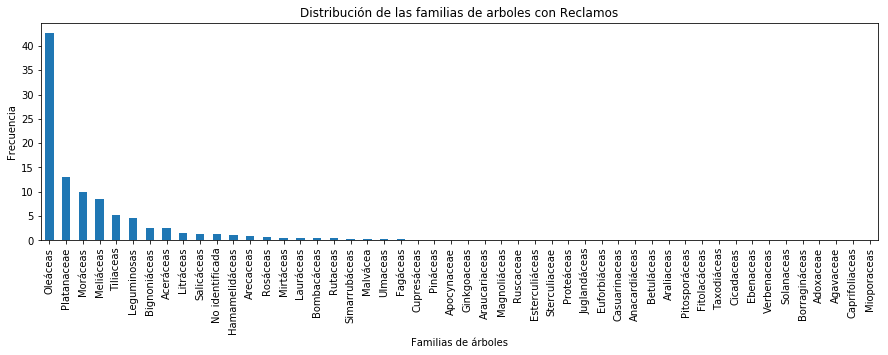

In [14]:
plot = (100 * df_reclamos_con_arboles['nombre_fam'].value_counts(normalize = True)).plot(kind='bar', \
        title='Distribución de las familias de arboles con Reclamos', figsize=(15, 4))

plt.xlabel('Familias de árboles')
plt.ylabel('Frecuencia');

Observamos que la distribucion de las especies de arboles que presentan reclamos se mantiene en relacion a la distribucion de arbolado lineal. <br> Las __oleáceas, platanaceae y moráceas__ son las que cuentan con mayor frecuencia. 

Vemos la proporción de familias de árboles en los reclamos. 


In [15]:
df_reclamos_con_arboles.nombre_fam.value_counts(normalize=True)*100

Oleáceas           42.577031
Platanaceae        12.966679
Moráceas            9.868724
Meliáceas           8.451440
Tiliaceas           5.253146
Leguminosas         4.596764
Bignoniáceas        2.656884
Aceráceas           2.489653
Litráceas           1.553159
Salicáceas          1.419374
No identificada     1.279318
Hamamelidáceas      1.093273
Arecaceas           0.930223
Rosáceas            0.650111
Mirtáceas           0.589490
Lauráceas           0.510055
Bombacáceas         0.503784
Rutaceas            0.422258
Simarrubáceas       0.351185
Malvácea            0.301016
Ulmaceas            0.278022
Fagáceas            0.194406
Cupresáceas         0.175593
Pináceas            0.129604
Apocynaceae         0.102429
Ginkgoaceas         0.091977
Araucariaceas       0.066892
Magnoliáceas        0.052260
Ruscaceae           0.045989
Esterculiáceas      0.043898
Sterculiaceae       0.043898
Proteáceas          0.041808
Juglandáceas        0.039717
Euforbiáceas        0.037627
Casuarinaceas 

           Dataset Arbolado           Dataset Reclamos
       Oleáceas       0.470211      Oleáceas       0.426018
       Platanaceae    0.094317      Platanaceae    0.129609
       Moráceas       0.072616      Moráceas       0.098761
       Meliáceas      0.066222      Meliáceas      0.084509
       Leguminosas    0.059981      Tiliaceas      0.052551

Modificamos los nombres en común para que queden más claros ya que pertenecen a la misma especie.

In [16]:
df_reclamos_con_arboles['nombre_com'].replace({'Fresno (Fresno común)':'Fresno común',\
                                          'Acacia de Baile (Mimosa de Baile)':'Mimosa de Baile',\
                                          'Ligustro disciplinado (Ligustro variegado)': 'Ligustro'}, inplace=True)

### Ahora vamos a ver que tipo de árboles tienen el __mayor porcentaje de reclamos__ en CABA:

In [17]:
recl_ar=df_reclamos_con_arboles['nombre_com'].value_counts(normalize=True).iloc[:10].round(2)*100

In [18]:
print( 'Top 10 de árboles con reclamos en CABA (%):')
print( recl_ar )

Top 10 de árboles con reclamos en CABA (%):
Fresno americano              34.0
Plátano                       13.0
Ficus                          9.0
Paraíso                        8.0
Tilo                           5.0
Ligustro                       4.0
Fresno común                   3.0
Jacarandá                      2.0
Arce negundo                   2.0
Crespón (Àrbol de Júpiter)     2.0
Name: nombre_com, dtype: float64


In [19]:
#Importamos plotly para poder realizar unos gráficos
import plotly
from plotly import __version__
print (__version__)
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pyo.init_notebook_mode()

3.7.1


Visualización a partir de un gráfico de torta 


In [20]:
grupos = ['Fresno Américano', 'Plátano', 'Ficus', 'Paraíso', 'Tilo',
          'Fresno común','Jacarandá', 'Arce negundo', 'Ligustro', 'Ligustro disciplinado']
colores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

pie_recl = go.Pie(labels=grupos, values=recl_ar,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=14),
               title='Top 10 de árboles con reclamos en CABA (%)',
               marker=dict(colors=colores, 
               line=dict(color='#000000', width=1)))
    
#ploteamos 
iplot([ pie_recl ])

Si analizamos por nombre común, observamos que el Fresno Americano encabeza los reclamos en un __34%__. Observemos esto en un gráfico de barras.

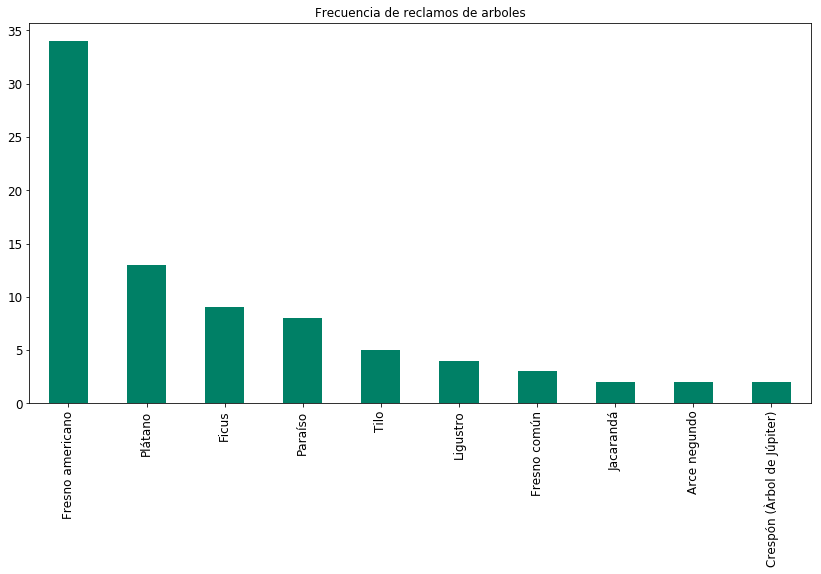

In [21]:
plt.title('Frecuencia de reclamos de arboles')
recl_ar.plot.bar(colormap='summer',figsize=(14, 7), fontsize = 12);

Analicemos un poco más el caso de la especie más abundante de la ciudad, el Fresno américano. Averiguaremos en que barrios se destacan más reclamos por pedidos de extracción de este árbol.

In [22]:
df_reclamos_con_arboles[
    ( df_reclamos_con_arboles['nombre_com'] == 'Fresno americano' ) &
    ( df_reclamos_con_arboles['concepto'] == 'EXTRACCION DE ARBOL' )].\
    groupby('barrio').agg('count').concepto.sort_values(ascending=False)

barrio
VILLA DEVOTO         97
PALERMO              90
VILLA URQUIZA        87
PARQUE CHACABUCO     84
CABALLITO            79
SAN CRISTOBAL        79
FLORES               71
MATADEROS            68
BELGRANO             62
SAAVEDRA             53
NUÑEZ                46
VILLA LUGANO         44
PARQUE AVELLANEDA    44
LINIERS              42
VELEZ SARSFIELD      42
BALVANERA            40
VILLA CRESPO         38
COLEGIALES           38
PARQUE PATRICIOS     38
BARRACAS             36
ALMAGRO              36
VILLA SANTA RITA     35
BOEDO                35
VILLA DEL PARQUE     33
MONTE CASTRO         33
RECOLETA             32
VILLA PUEYRREDON     32
BOCA                 32
FLORESTA             31
PARQUE CHAS          28
VILLA REAL           24
NUEVA POMPEYA        23
AGRONOMIA            23
VILLA SOLDATI        22
VERSALLES            22
VILLA GRAL. MITRE    22
VILLA LURO           21
VILLA ORTUZAR        21
COGHLAN              18
CHACARITA            15
CONSTITUCION         13
MONSERRAT

Villa Devoto con 97, Palermo con 90 y Villa Urquiza con 87 encabezan el TOP 3 de reclamos por pedido de extracción de árboles de Fresno.
Los barrios con menos reclamos: Retiro, Paternal, Villa Riachuelo y Monserrat.

Veremos barrio por barrio, cuales fueron los árboles que tuvieron más reclamos.

In [23]:
df_reclamos_con_arboles.groupby(['barrio', 'nombre_com']).count()['concepto']

barrio         nombre_com                                        
AGRONOMIA      Acacia blanca                                           1
               Acacia de constantinopla                                2
               Arce negundo                                            7
               Arce tridente                                           1
               Cedro del Atlas (Cedro plateado o Cedro atlántico)      2
               Ceibo                                                   3
               Crespón (Àrbol de Júpiter)                              2
               Falso Alcanforero                                       6
               Ficus                                                  49
               Ficus variegado                                         3
               Fresno                                                 15
               Fresno americano                                      220
               Fresno común                               

Vamos a ver la cantidad de árboles con __una altura mayor a 60 metros__ en CABA dentro de los reclamos:

In [24]:
arboles_altos= df_reclamos_con_arboles[ df_reclamos_con_arboles['altura_tot']== 60].\
        sort_values(by='origen', ascending=False )
print( "Cantidad de árboles de 60 m de altura:", arboles_altos.shape[0] )

Cantidad de árboles de 60 m de altura: 8


Solo encontramos 8 arboles con 60 metros de altura, aprox un 10% del dataset de arbolado. 


Analicemos cuantos reclamos corresponden a los __árboles con inclinación mayor a 45 grados__:

In [25]:
arboles_inclinados= df_reclamos_con_arboles[df_reclamos_con_arboles['inclinacio']>= 45].sort_values(by='origen', ascending=False)
print("Cantidad de arboles inclinados mayores a 45 grados:", arboles_inclinados.shape[0])

Cantidad de arboles inclinados mayores a 45 grados: 16


Ahora vamos a ver que árboles con ángulo peligroso tienen el __mayor porcentaje de reclamos__ en CABA:

In [26]:
df_45 = arboles_inclinados[arboles_inclinados['inclinacio']>= 45]['nombre_com'].\
            value_counts(normalize=True).round(2)*100

In [27]:
print( 'Top 10 de árboles con angulo peligroso de\n inclinacion con reclamos en CABA (%):')
print( df_45)

Top 10 de árboles con angulo peligroso de
 inclinacion con reclamos en CABA (%):
Fresno americano    31.0
Paraíso             12.0
Tipa blanca         12.0
Plátano              6.0
Morera blanca        6.0
Jacarandá            6.0
Durazno              6.0
Abedul blanco        6.0
Fresno común         6.0
Mimosa de Baile      6.0
Name: nombre_com, dtype: float64


Solo encontramos __14 árboles__ con una inclinación mayor a 45 grados que corresponde a un 7% comparado con los 207 del dataset de arbolado lineal.

Veamos la frecuencia en un gráfico de barras


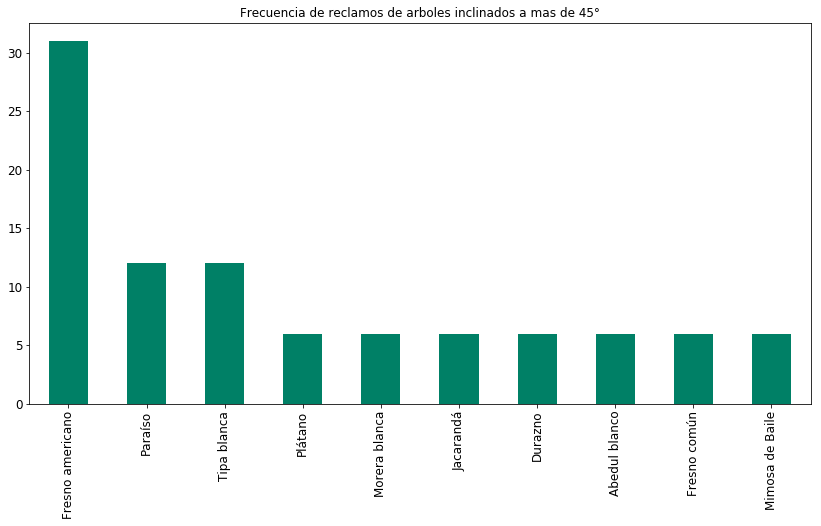

In [28]:
plt.title('Frecuencia de reclamos de arboles inclinados a mas de 45°')
df_45.plot.bar(colormap='summer',figsize=(14, 7), fontsize = 12);

Graficamos la frecuencia de los árboles inclinados en un gráfico de torta.

In [29]:
grupos = ['Fresno Américano', 'Tipa blanca', 'Paraíso', 'Abedul blanco', 'Fresno común',
          'Durazno','Jacarandá', 'Mimosa de Baile', 'Plátano', 'Morera blanca']
colores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

pie_recl_nom = go.Pie(labels=grupos, values=df_45,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=14),
               title='Reclamos de árboles con ángulo mayor a 45',
               marker=dict(colors=colores, 
               line=dict(color='#000000', width=1)))
    
#ploteamos 
iplot([ pie_recl_nom ])

#### Las especies que se resaltan por estar en ángulo peligroso y presentar reclamos son:
- Abedul blanco
- Acacia de Baile
- Durazno
- Fresno común
- Fresno americano
- Tipa blanca
- Morera blanca
- Paraiso
- Jacarandá
- Platano

Vemos la cantidad de árboles que tienen __altura cero__:

In [30]:
arboles_0 = df_reclamos_con_arboles[df_reclamos_con_arboles['altura_tot']== 0]
print("Arboles con 0m de altura:", arboles_0.shape[0])

Arboles con 0m de altura: 9


In [31]:
arboles_0

periodo                   categoria  \
842     201801  ARBOLADO Y ESPACIOS VERDES   
844     201809  ARBOLADO Y ESPACIOS VERDES   
2366    201801  ARBOLADO Y ESPACIOS VERDES   
8912    201804  ARBOLADO Y ESPACIOS VERDES   
9390    201804  ARBOLADO Y ESPACIOS VERDES   
23773   201808  ARBOLADO Y ESPACIOS VERDES   
42506   201901  ARBOLADO Y ESPACIOS VERDES   
44670   201902  ARBOLADO Y ESPACIOS VERDES   
47768   201903  ARBOLADO Y ESPACIOS VERDES   

                                  subcategoria  \
842       PODA DE ARBOL Y DESPEJE DE LUMINARIA   
844    PROBLEMA CON INTERVENCIONES DE ARBOLADO   
2366      PODA DE ARBOL Y DESPEJE DE LUMINARIA   
8912                       PLANTACION DE ARBOL   
9390      PODA DE ARBOL Y DESPEJE DE LUMINARIA   
23773  PROBLEMA CON INTERVENCIONES DE ARBOLADO   
42506                      PLANTACION DE ARBOL   
44670                      EXTRACCION DE ARBOL   
47768     PODA DE ARBOL Y DESPEJE DE LUMINARIA   

                                                         concepto  \
842                 PODA DE ARBOL/DESPEJE DE LUMINARIA O SEMAFORO   
844                      PROBLEMAS CON INTERVENCIONES DE ARBOLADO   
2366                PODA DE ARBOL/DESPEJE DE LUMINARIA O SEMAFORO   
8912                                          PLANTACION DE ARBOL   
9390                PODA DE ARBOL/DESPEJE DE LUMINARIA O SEMAFORO   
23773  FALTA DE RECOLECCION DE RESTOS DE PODA DE ARBOLADO PUBLICO   
42506                                         PLANTACION DE ARBOL   
44670                                         EXTRACCION DE ARBOL   
47768               PODA DE ARBOL/DESPEJE DE LUMINARIA O SEMAFORO   

      tipo_prestacion fecha_ingreso domicilio_cgpc domicilio_barrio  \
842         SOLICITUD    2018-01-10       COMUNA 5          ALMAGRO   
844         SOLICITUD    2018-09-10       COMUNA 5          ALMAGRO   
2366        SOLICITUD    2018-01-31       COMUNA 1        SAN TELMO   
8912        SOLICITUD    2018-04-12       COMUNA 7           FLORES   
9390        SOLICITUD    2018-04-16      COMUNA 15    VILLA ORTÚZAR   
23773       SOLICITUD    2018-08-07       COMUNA 5          ALMAGRO   
42506       SOLICITUD    2019-01-18       COMUNA 3    SAN CRISTÓBAL   
44670       SOLICITUD    2019-02-14       COMUNA 3    SAN CRISTÓBAL   
47768       SOLICITUD    2019-03-29      COMUNA 11     VILLA DEVOTO   

                         domicilio_calle  domicilio_altura      lat_x  \
842                          MEDRANO AV.             917.0 -34.599262   
844                          MEDRANO AV.             917.0 -34.599262   
2366                      ESTADOS UNIDOS             738.0 -34.618585   
8912                             PORTELA             490.0 -34.637562   
9390                ACHA, MARIANO, GRAL.            1701.0 -34.577031   
23773  PERON, JUAN DOMINGO, TTE. GENERAL            3894.0 -34.606059   
42506                   LUCA, ESTEBAN DE            1460.0 -34.627414   
44670                 GARAY, JUAN DE AV.            2369.0 -34.628220   
47768                            LADINES            3392.0 -34.587726   

          long_x canal     genero estado_del_contacto fecha_cierre_contacto  \
842   -58.420327   147   femenino             Cerrado            2018-01-11   
844   -58.420327   Web  masculino             Cerrado            2018-09-12   
2366  -58.376412   147   femenino             Abierto                   NaN   
8912  -58.470858   Web  masculino             Cerrado            2018-10-03   
9390  -58.472809   Web  masculino             Cerrado            2018-04-17   
23773 -58.421102   147  masculino             Abierto                   NaN   
42506 -58.403756   147  masculino             Abierto                   NaN   
44670 -58.398064   Web  masculino             Abierto                   NaN   
47768 -58.510933   Web  masculino             Cerrado            2019-04-06   

          long_y      lat_y  altura_tot  diametro  inclinacio  \
842   -58.420388 -34.599698           0         0       

De los 9 árboles con altura 0 metros, 7 son de especie 'No determinada'.

**Veamos la frecuencia de las distintas subcategorías de reclamos.**


In [32]:
df_subcat= df_reclamos_con_arboles['subcategoria'].value_counts(normalize=True).round(2)*100
df_subcat

PODA DE ARBOL Y DESPEJE DE LUMINARIA       45.0
PROBLEMA CON INTERVENCIONES DE ARBOLADO    31.0
EXTRACCION DE ARBOL                        14.0
PLANTACION DE ARBOL                         8.0
PLAGAS / ENFERMEDADES EN ARBOL              2.0
PARQUES Y PLAZAS                            1.0
Name: subcategoria, dtype: float64

Observemos cuales son los __tipos de reclamos por subcategoria__:

In [33]:
grupos = ['PODA DE ARBOL Y DESPEJE DE LUMINARIA', 'PROBLEMA CON INTERVENCIONES DE ARBOLADO',
          'EXTRACCION DE ARBOL', 'PLANTACION DE ARBOL', 'PLAGAS / ENFERMEDADES EN ARBOL',
          'PARQUES Y PLAZAS']
colores = ["#1f77b4", "#ff7f0e", "#9467bd", "#8c564b", "#bcbd22", "#17becf"]

pie_recl_nom = go.Pie(labels=grupos, values=df_subcat,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=14),
               title='Proporcion de reclamos por problema con arboles',
               marker=dict(colors=colores, 
               line=dict(color='#000000', width=1)))
    
#ploteamos 
iplot([ pie_recl_nom ])

Casi la mitad de los reclamos corresponden a Poda y Despeje de Luminaria y un 31% estan relacionados con extracción del árbol. 

#### Vemos en un grafico de barras horizontales, la cantidad de observaciones por subcategoría y dependiendo del tipo de prestación

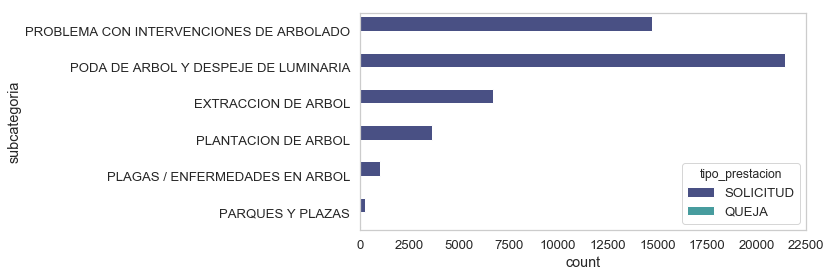

In [34]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(y="subcategoria", hue="tipo_prestacion",  palette="mako", data=df_reclamos_con_arboles);

En las barras horizontales vemos la cantidad de observaciones por subcategoría. Donde podemos observar que la mayoría son por poda de árbol y despeje de luminaria, seguido por problemas con las intervenciones de arbolado. <br> Por el color de estas barras, también podemos ver, en el tipo de prestación, que casí el 100% de ellas son solicitudes y no quejas.

#### Veremos en un grafico de barras horizontales, la cantidad de observaciones por subcategoría y asginandole un color según el estado del contacto

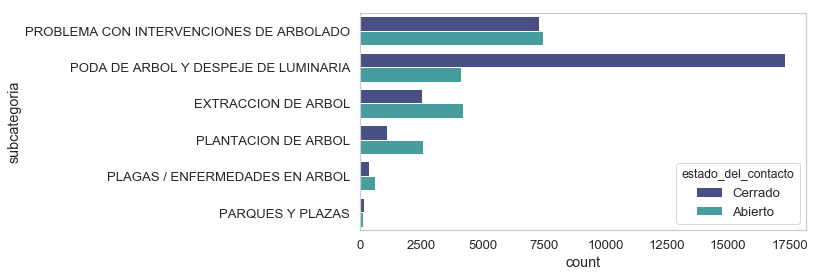

In [35]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(8,4))
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(y="subcategoria", hue="estado_del_contacto",  palette="mako", data=df_reclamos_con_arboles);

- En las barras horizontales vemos la cantidad de observaciones por subcategoría. Donde podemos observar que si bien "poda de árbol y despeje de luminaria" son la mayoría, son los que tienen la mayor cantidad de cerrados.
- El que le sigue, "problemas con intervenciones de arbolado", tiene la misma cantidad de reclamos abiertos que de cerrados. 
- Tambien podemos ver que en la mayoría de las subcategorias hay mas reclamos abiertos que cerrados. 
- Eso dificulta entender si un problema con un árbol ya fue solucionado (por ejemplo, si fue extraido) o no

***

## Análisis de Reclamos por Barrio

Nos fijamos como estan distribuidos los reclamos por barrio (en porcentajes)

In [36]:
recl_barr=df_reclamos_con_arboles['barrio'].value_counts(normalize=True).round(4)*100
recl_barr

VILLA DEVOTO         6.43
PALERMO              4.95
FLORES               4.94
MATADEROS            4.91
CABALLITO            4.53
BELGRANO             4.12
VILLA URQUIZA        3.82
VILLA DEL PARQUE     3.80
VILLA LUGANO         3.27
PARQUE CHACABUCO     3.20
LINIERS              3.14
VILLA CRESPO         2.79
PARQUE AVELLANEDA    2.76
VILLA PUEYRREDON     2.46
MONTE CASTRO         2.44
VILLA SANTA RITA     2.40
SAAVEDRA             2.39
NUÑEZ                2.31
COLEGIALES           2.11
NUEVA POMPEYA        1.96
FLORESTA             1.91
VELEZ SARSFIELD      1.87
ALMAGRO              1.85
VILLA GRAL. MITRE    1.83
BOEDO                1.71
PARQUE CHAS          1.70
VILLA ORTUZAR        1.69
VILLA LURO           1.63
CHACARITA            1.51
BARRACAS             1.42
RECOLETA             1.34
PARQUE PATRICIOS     1.32
VILLA RIACHUELO      1.27
AGRONOMIA            1.26
VILLA REAL           1.17
COGHLAN              1.14
PATERNAL             1.10
SAN CRISTOBAL        1.06
BALVANERA   

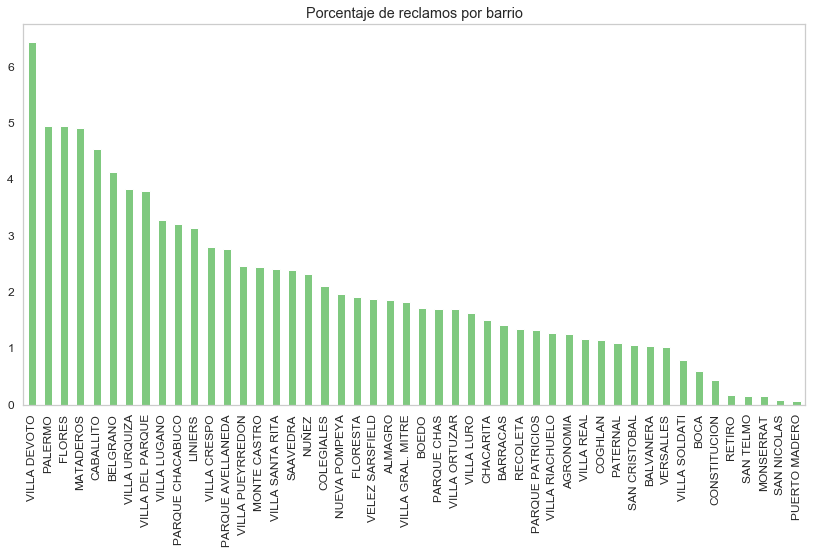

In [37]:
plt.title('Porcentaje de reclamos por barrio')
recl_barr.plot.bar(colormap='Accent',figsize=(14, 7), fontsize = 12);

En el gráfico de barras anterior podemos ver como la mayor cantidad de reclamos por barrio se encuentra en Villa Devoto, Palermo y Flores. <br> Por el otro lado, San Nicolas (Microcentro) y Puerto Madero son las que cuentan con la menor cantidad, esto puede estar relacionado a que son barrios muy comerciales que no cuentan con tanto paisaje arbolístico . 

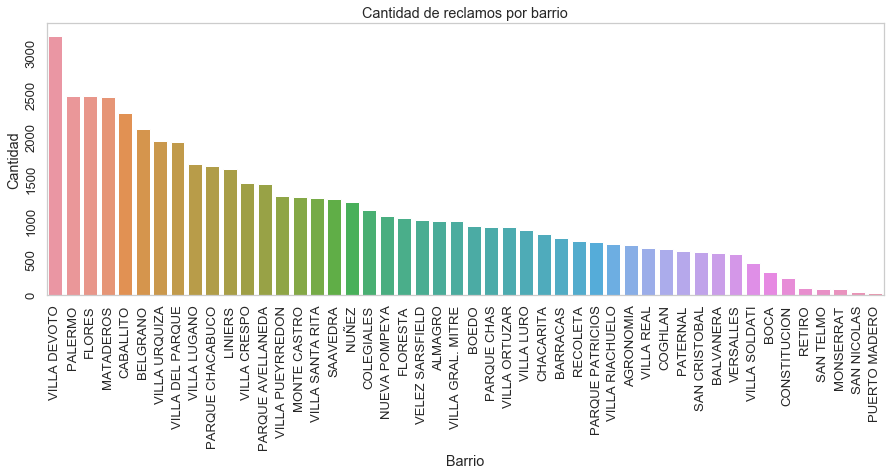

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='barrio',
              data= df_reclamos_con_arboles,
              order=df_reclamos_con_arboles['barrio'].value_counts().index)

plt.title('Cantidad de reclamos por barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.tick_params(labelrotation=90)
plt.show()

En este grafico observamos la cantidad total de reclamos relacionados a arbolado discriminado por barrio. Villa Devoto encabeza la lista con aprox 3000 reclamos que representan el 6%. Del Dataset de arbolado obtuvimos el número de árboles ubicados a V. Devoto (17538 árboles). Esto representa que mas del 17% de los árboles del barrio tuvieron un reclamo durante 2018 y 2019.

### Realizamos 4 gráficos, uno para cada subcategoría, que nos muestran la cantidad de reclamos que hay por barrio

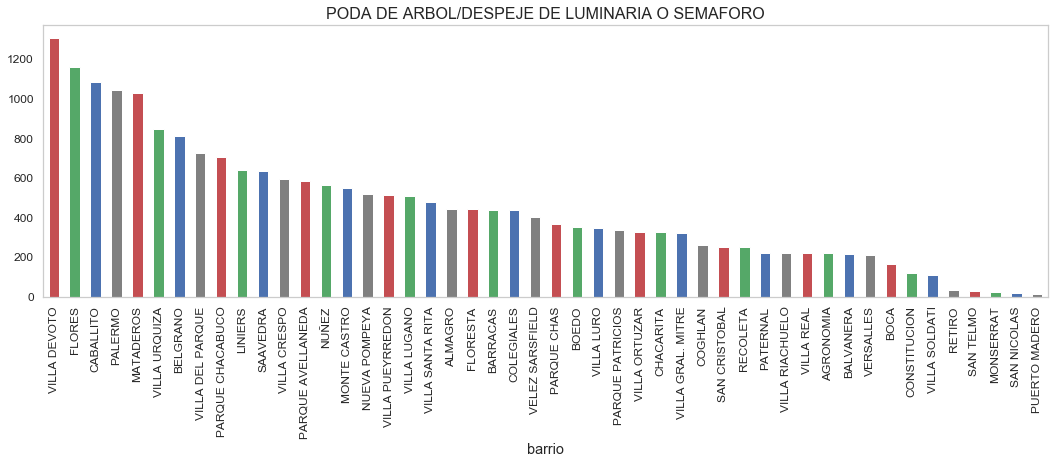

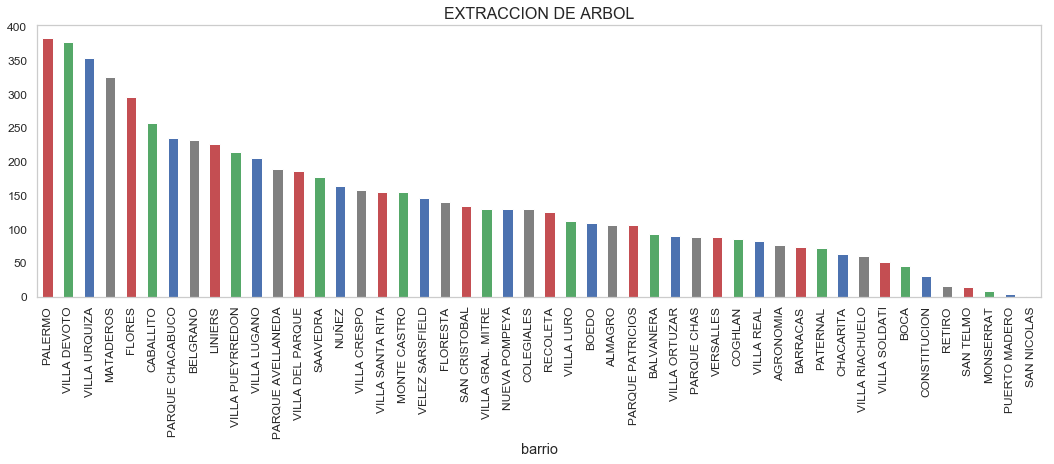

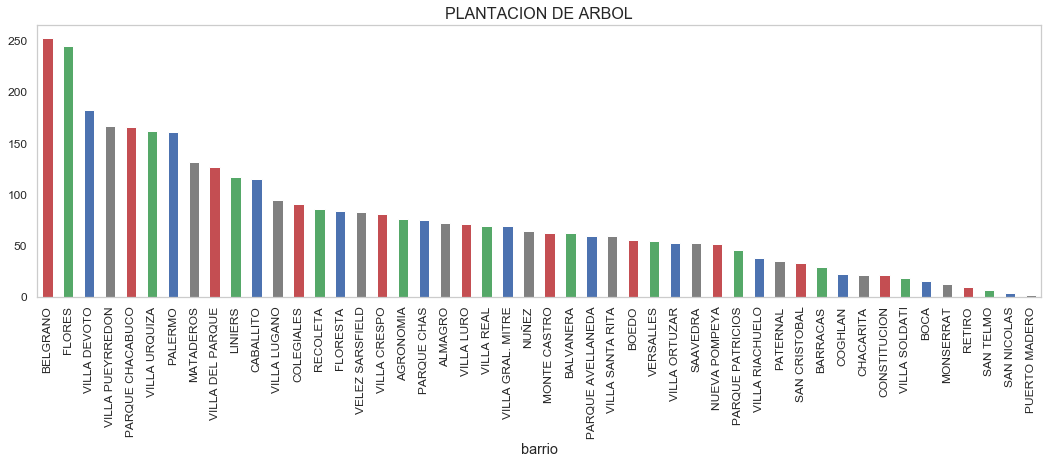

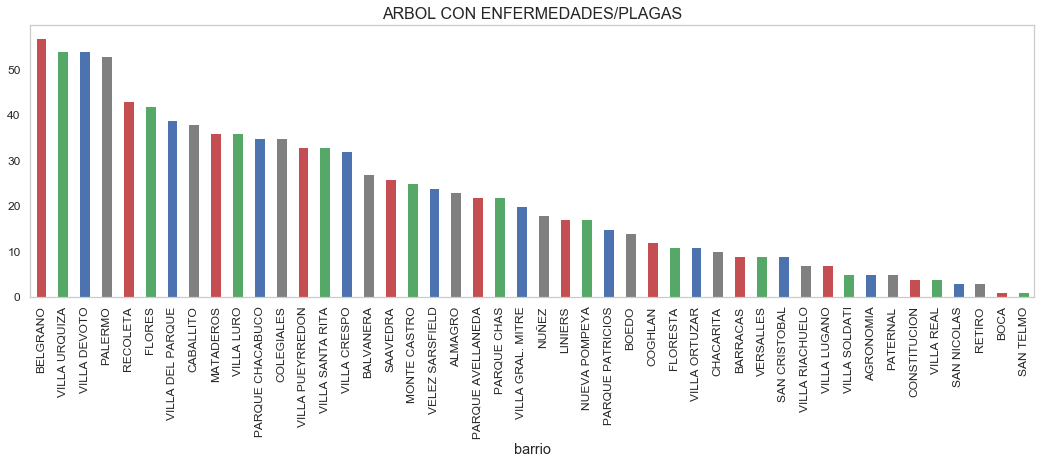

In [39]:
df_recl_arb = df_reclamos_con_arboles[
    ( df_reclamos_con_arboles.subcategoria == 'PODA DE ARBOL Y DESPEJE DE LUMINARIA' ) |
    ( df_reclamos_con_arboles.subcategoria == 'EXTRACCION DE ARBOL' ) |
    ( df_reclamos_con_arboles.subcategoria == 'PLANTACION DE ARBOL' ) |
    ( df_reclamos_con_arboles.subcategoria == 'PLAGAS / ENFERMEDADES EN ARBOL' )
]

conceptos = df_recl_arb.concepto.unique()

for con in conceptos:
    df_plot_x_concepto = df_recl_arb[(df_recl_arb.concepto == con)].groupby(['barrio']).agg(['count']).\
    canal.sort_values(by='count', ascending=False)
    df_plot_x_concepto.plot(kind='bar', color=('r', 'g','b','grey'), figsize=(18,5), 
                            fontsize = 12,
                            legend=False)
    plt.title((con), fontsize=16);

- __Poda de árbol / despeje de luminaria o semáforo__: la mayor cantidad de estos reclamos se encuentra en Villa Devoto. Casi 1300 corresponden a esta categoría. 
- __Extracción de árbol__: la mayor cantidad de estos reclamos se encuentra en Palermo y la menor en San Nicolás. 
- __Plantación de árbol__: En Belgrano y en Flores, los dos con casi 250 reclamos, tienen la mayoría en esta subcategoría. 
- __Árbol con enfermedades / plagas__: Podemos ver que en Belgrano, VIlla Urquiza, Palermo y Recoleta se encuentra la mayoría de reclamos por esto. Que sean barrios cercanos nos hace pensar si la enfermedad tiene que ver con esta cercanía. 

In [40]:
enf= df_reclamos_con_arboles[(
     df_reclamos_con_arboles.subcategoria == 'PLAGAS / ENFERMEDADES EN ARBOL')]\
     ['nombre_com'].sort_values().value_counts(normalize=True).round(2)*100

In [41]:
print( 'Top 5 de árboles enfermos\n o con plagas (%):')
print( enf)

Top 5 de árboles enfermos
 o con plagas (%):
Fresno americano                                   21.0
Plátano                                            17.0
Paraíso                                            15.0
Ficus                                              11.0
Tilo                                                7.0
Ligustro                                            4.0
Jacarandá                                           3.0
Crespón (Àrbol de Júpiter)                          2.0
Tipa blanca                                         2.0
Arce negundo                                        2.0
Fresno común                                        2.0
No Determinable                                     2.0
Liquidambar                                         1.0
Acacia blanca                                       1.0
Visco (Viscote, Arca)                               1.0
Acacia bola                                         1.0
Limpiatubos                                         1.0
Aca

Veamos que proporción sobre el total de fresnos americanos representa. En la Notebook 1 habíamos encontrado que el total de fresnos americanos era 141825.

In [42]:
fres_enf= df_reclamos_con_arboles[(
     df_reclamos_con_arboles.subcategoria == 'PLAGAS / ENFERMEDADES EN ARBOL') &
     (df_reclamos_con_arboles.nombre_com == 'Fresno americano')]['nombre_com'].value_counts()

In [43]:
(fres_enf/141825)*100

Fresno americano    0.151595
Name: nombre_com, dtype: float64

Representa tan solo el 0.15% de la totalidad de los fresnos

### Graficamos la cantidad de reclamos por barrio, asignandole un color a los reclamos abiertos y otro a los cerrados.

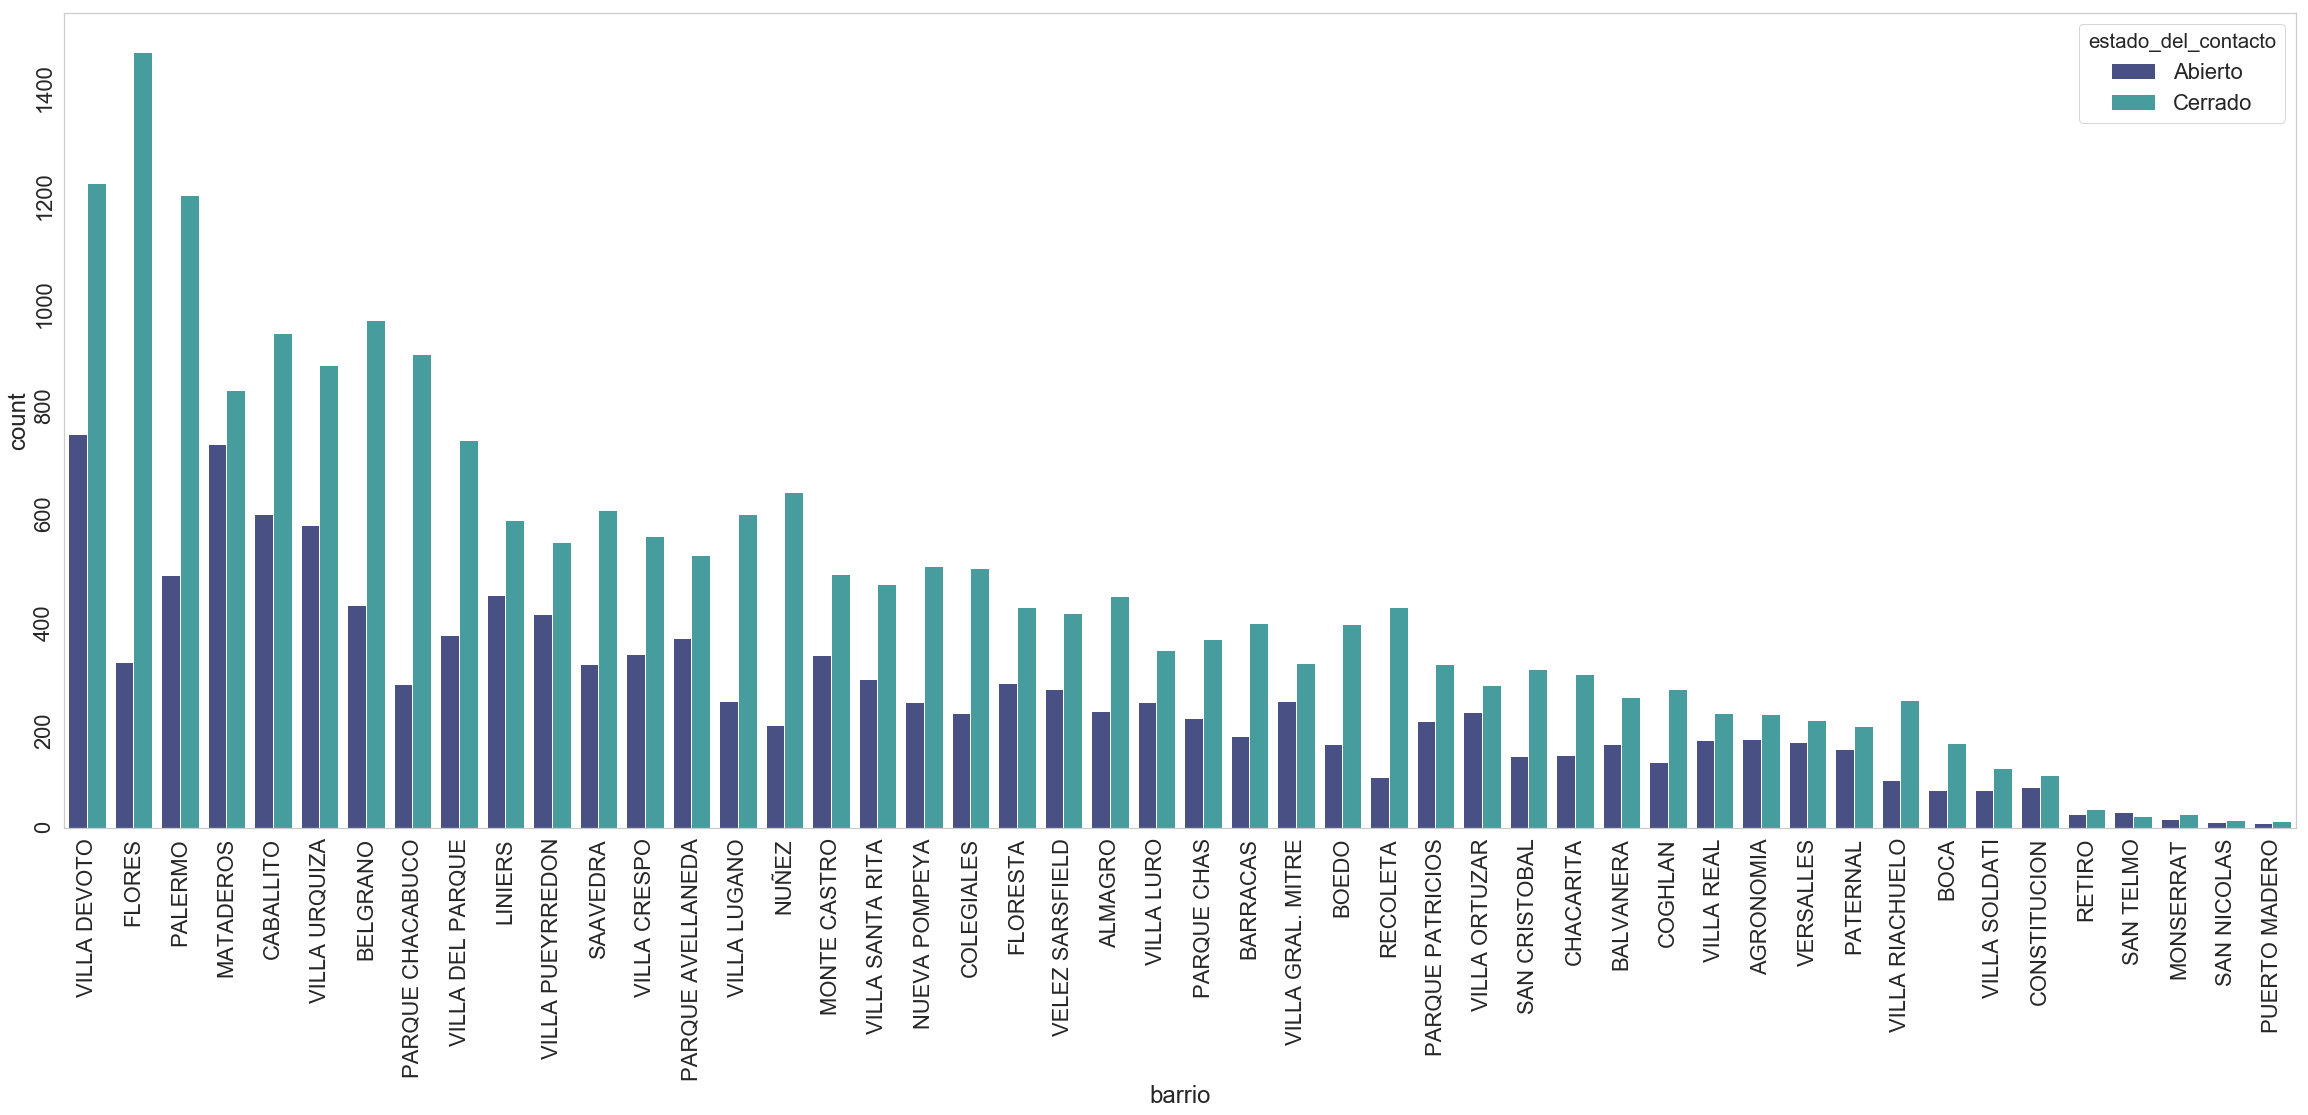

In [44]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(40,15))
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tick_params(labelrotation=90)
sns.countplot(x="barrio", 
              hue="estado_del_contacto",  
              palette="mako", 
              order=df_recl_arb['barrio'].value_counts().index,
              data=df_recl_arb);


En el gráfico anterior se observa que la mayor cantidad de reclamos todavía abiertos se encuentra en el barrio de Villa Devoto, con casi 800 reclamos abiertos todavía. Esto claramente tiene que ver con que este barrio es también el que cuenta con mayor cantidad de reclamos. <br> Por el otro lado, Flores tiene la mayor cantidad de reclamos cerrados, con más de 1400.  

### Graficamos la cantidad de reclamos por barrio, asignandole un color según el género de la persona que realizó el reclamo

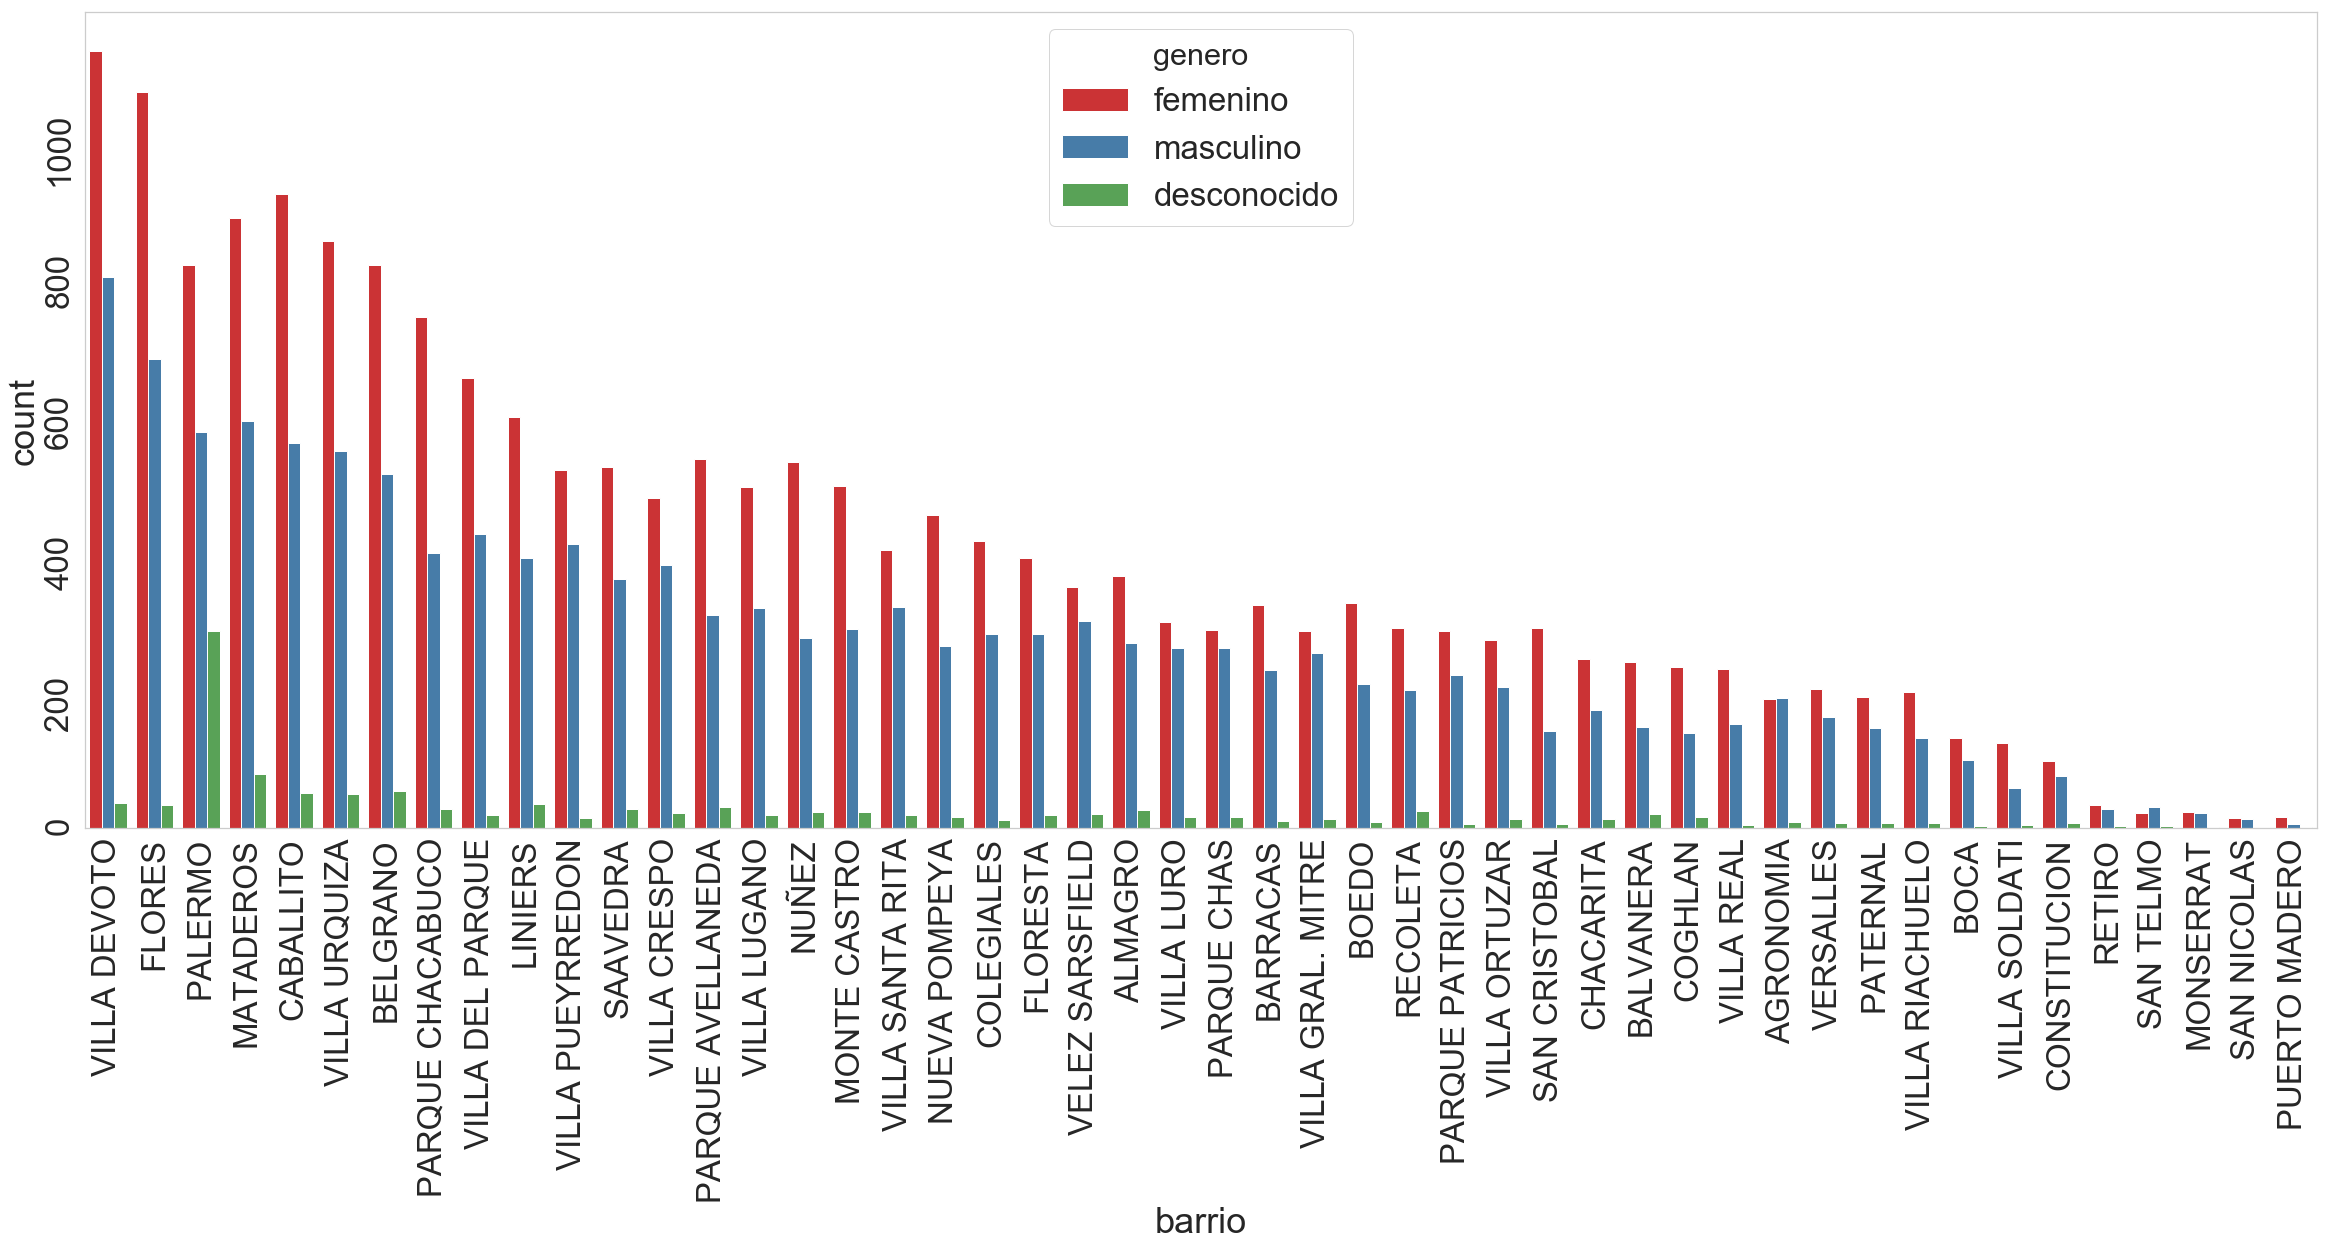

In [45]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(40,15))
sns.set(font_scale=3)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tick_params(labelrotation=90)
sns.countplot(x="barrio", 
              hue="genero",  
              palette="Set1", 
              order=df_recl_arb['barrio'].value_counts().index,
              data=df_recl_arb);

La mayoría de los reclamos, en todos los barrios, son realizadas por personas del género femenino. 

Hacemos zoom a los barrios que tienen mayor cantidad de reclamos.

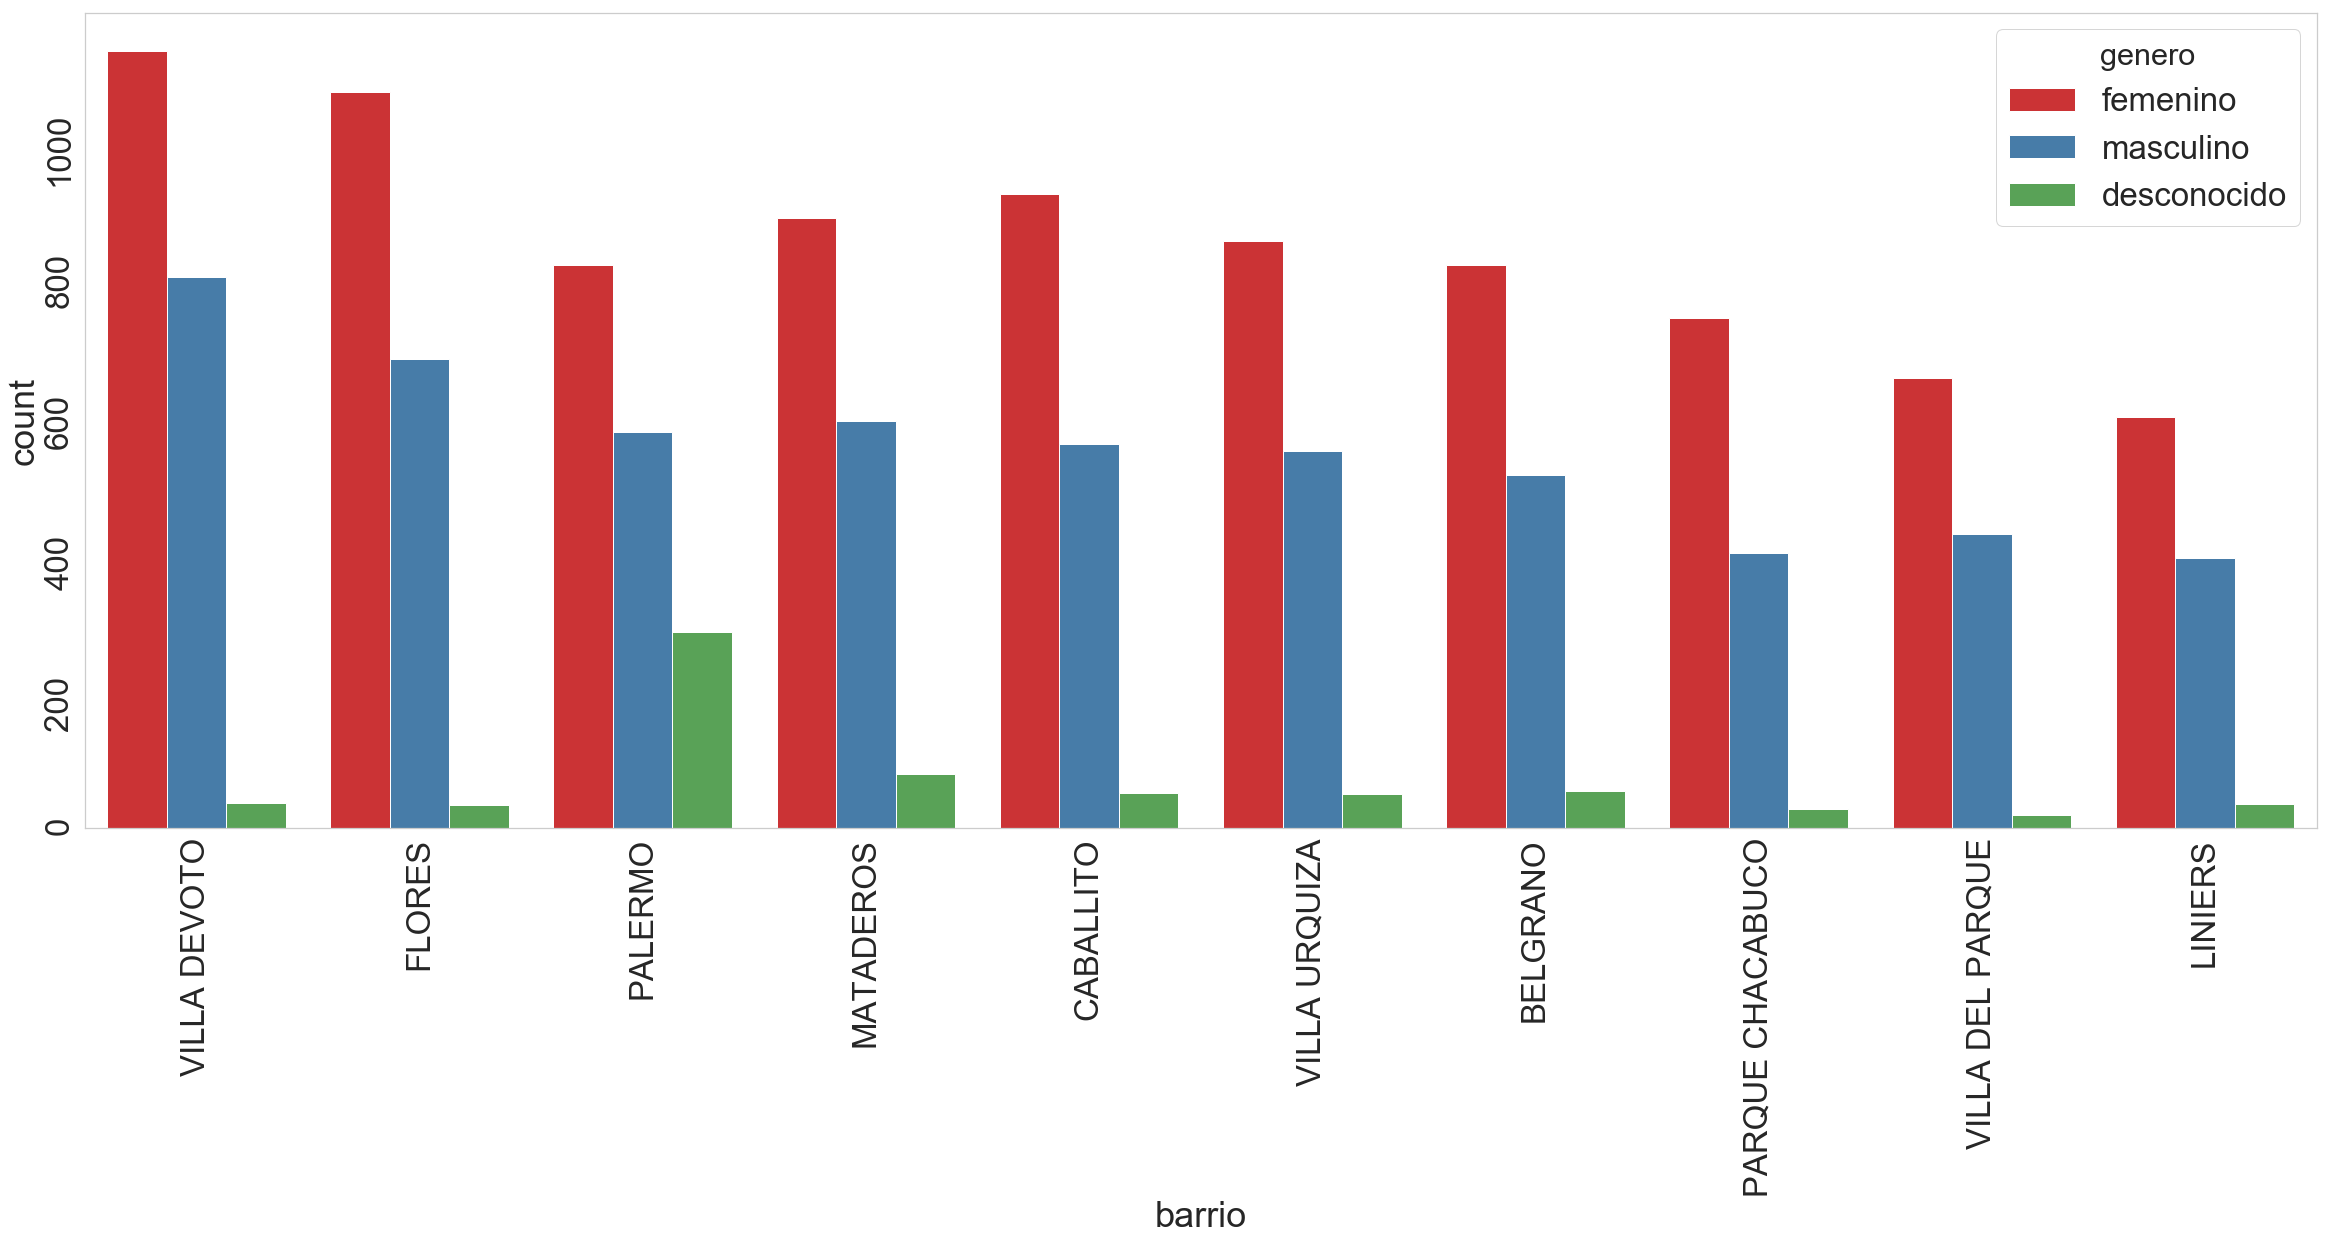

In [46]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(40,15))
sns.set(font_scale=3)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tick_params(labelrotation=90)
sns.countplot(x="barrio", 
              hue="genero",  
              palette="Set1", 
              order=df_recl_arb['barrio'].value_counts().iloc[:10].index,
              data=df_recl_arb);

### Graficamos la cantidad de reclamos por barrio, asignandole un color según el canal por el cual se realizó el reclamo

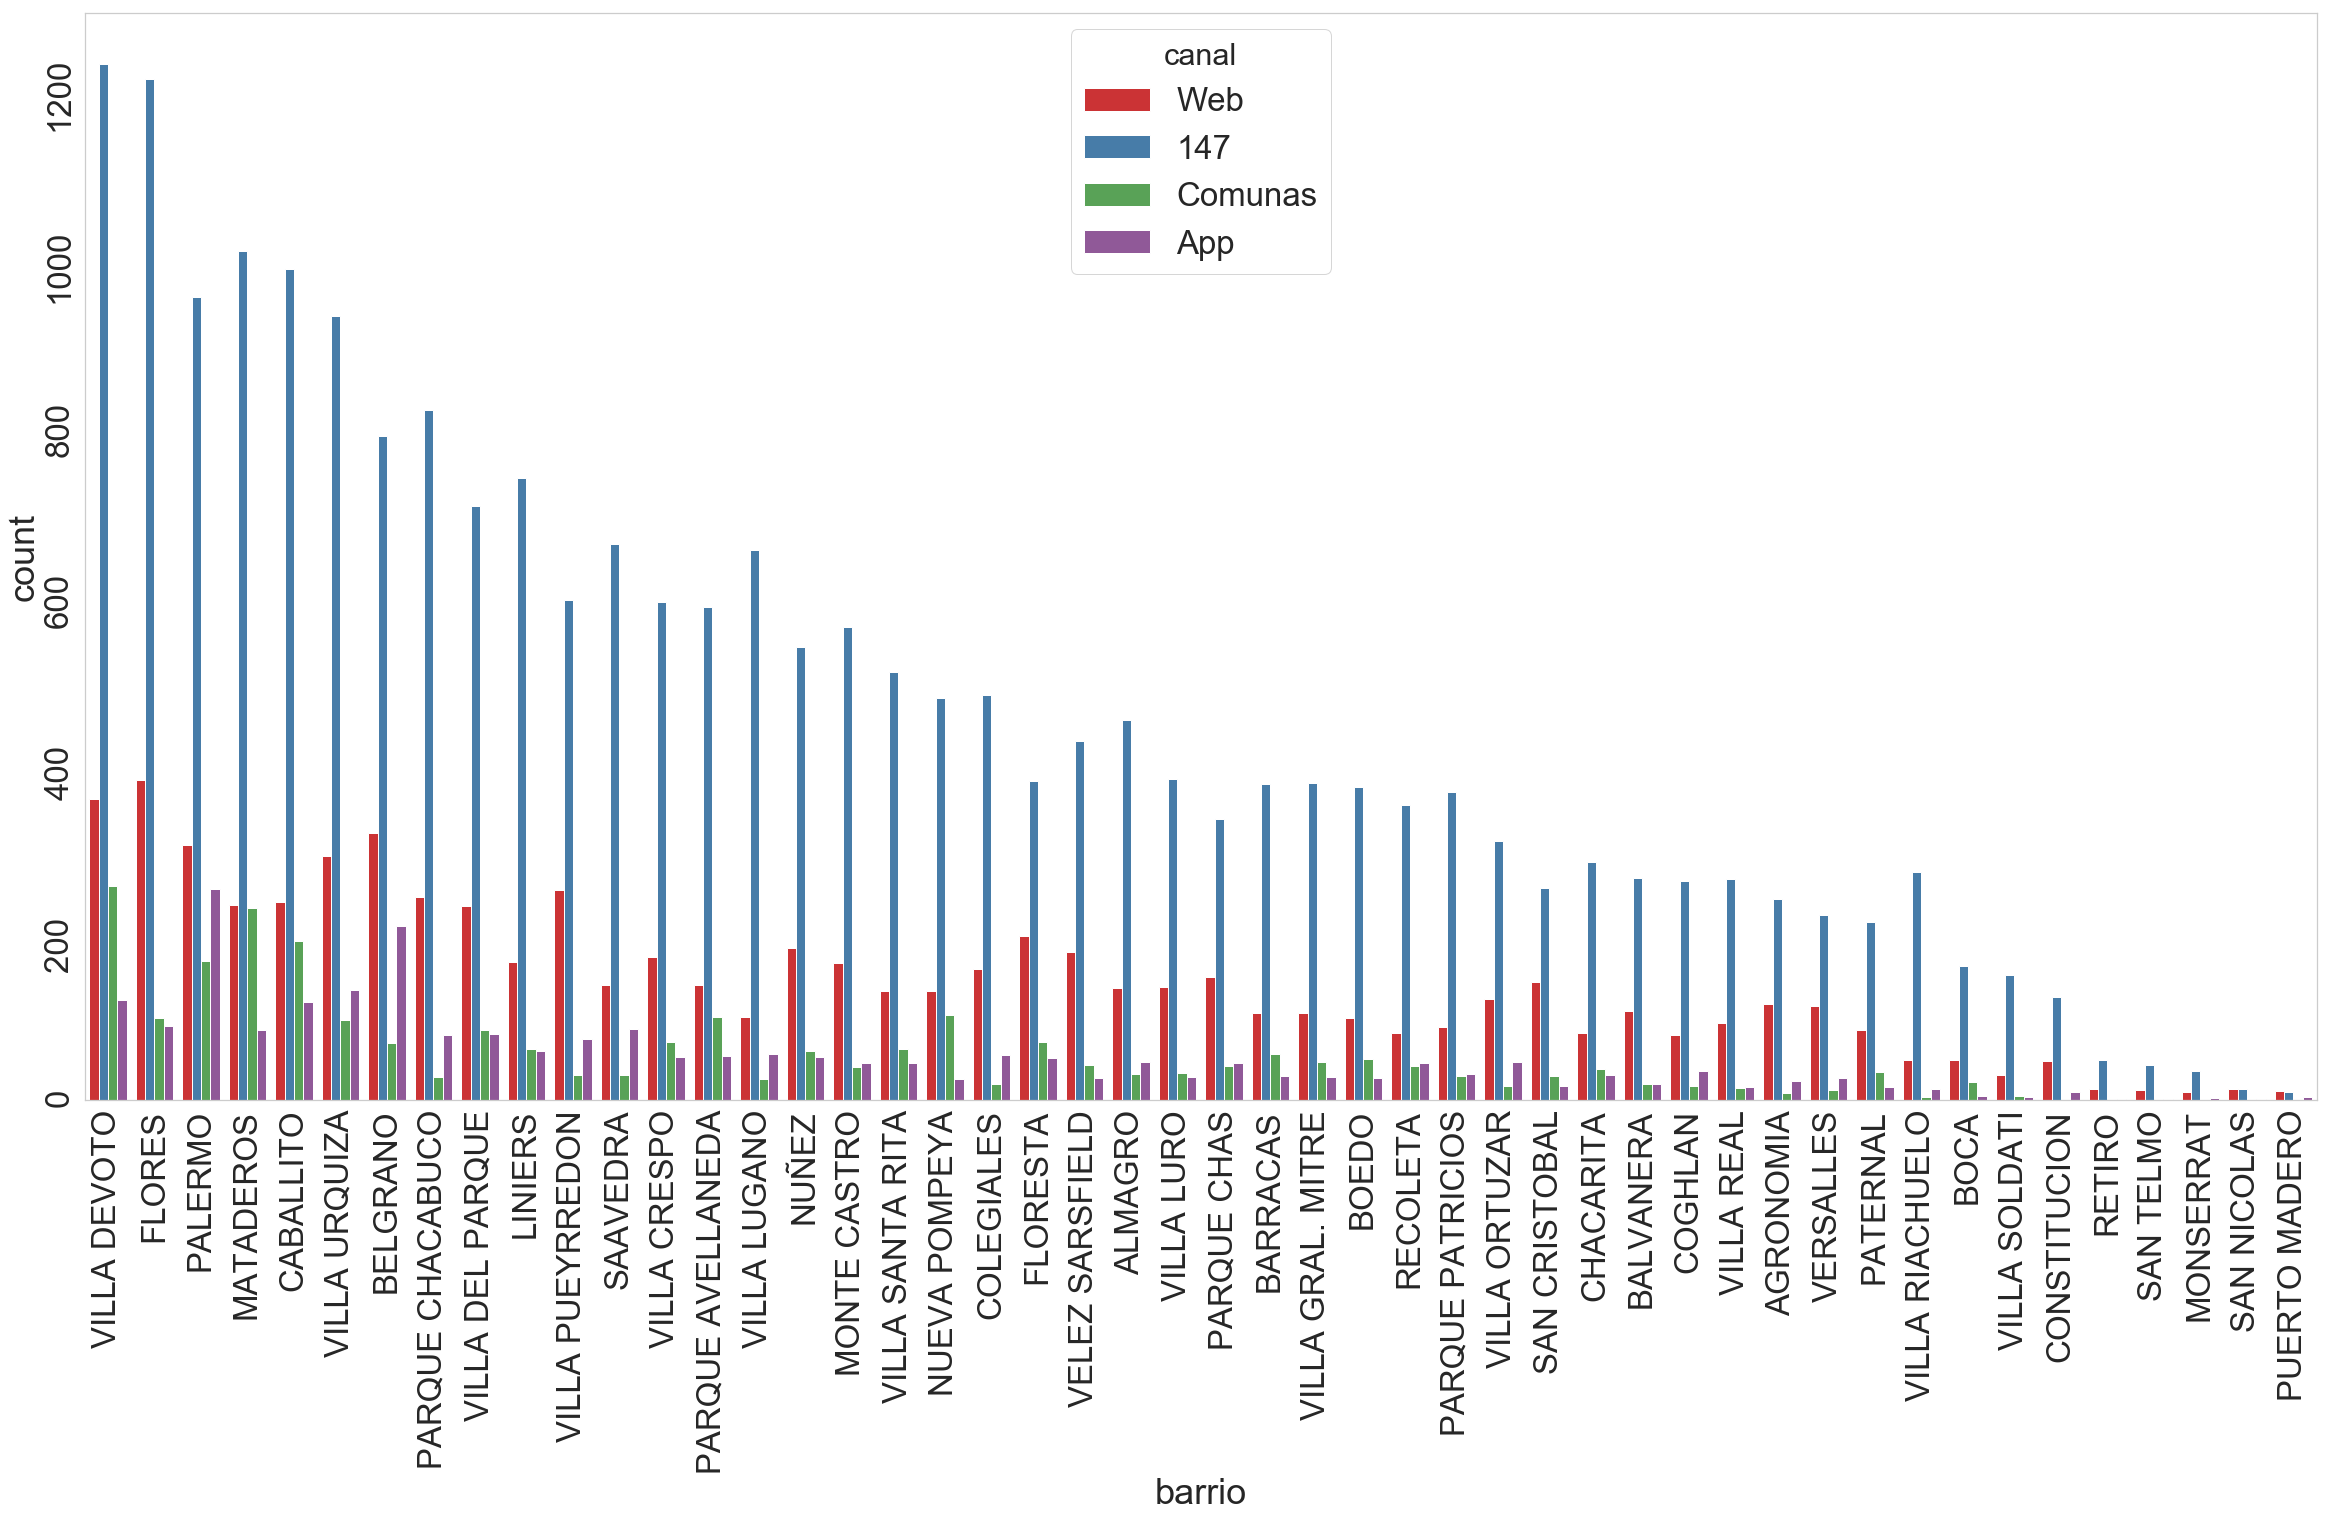

In [47]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(40,20))
sns.set(font_scale=3)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tick_params(labelrotation=90)
sns.countplot(x="barrio", 
              hue="canal",  
              palette='Set1', 
              order=df_recl_arb['barrio'].value_counts().index,
              data=df_recl_arb);

Se ve que, en todos los barrios, la mayoría de los reclamos esta hecho por llamadas al __147__. Después le sigue la __web__, en la mayoría de los barrios. Esto puede estar relacionado a que estos dos canales son los que están a disposición de la mayoría de la gente.

Veamos esto en los barrios que mas reclamos se han computado

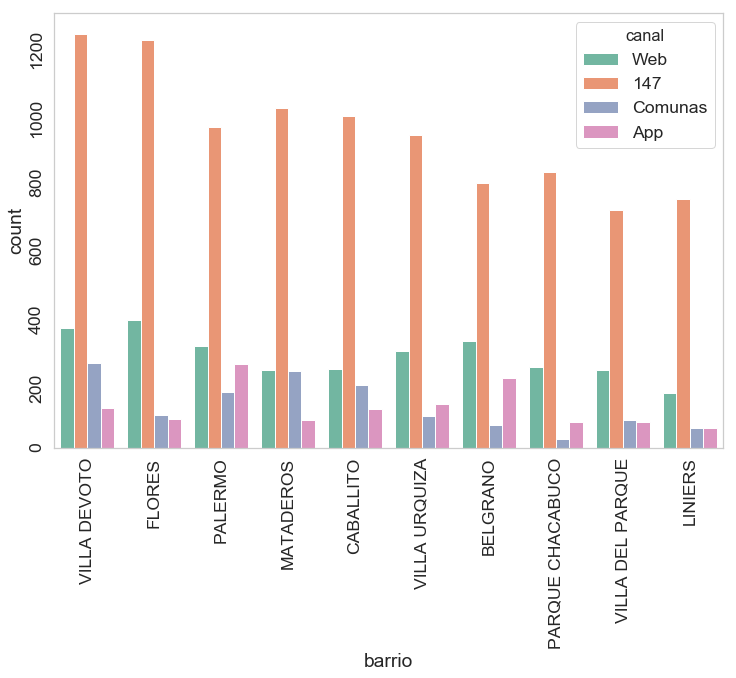

In [48]:
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(12,8))
sns.set(font_scale=1.6)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tick_params(labelrotation=90)
sns.countplot(x="barrio", 
              hue="canal",  
              palette="Set2", 
              order=df_recl_arb['barrio'].value_counts().iloc[:10].index,
              data=df_recl_arb);

Observemos la proporción que representa cada canal de comunicación por barrio

In [49]:
frec_canal = df_recl_arb['canal'].value_counts(normalize=True)

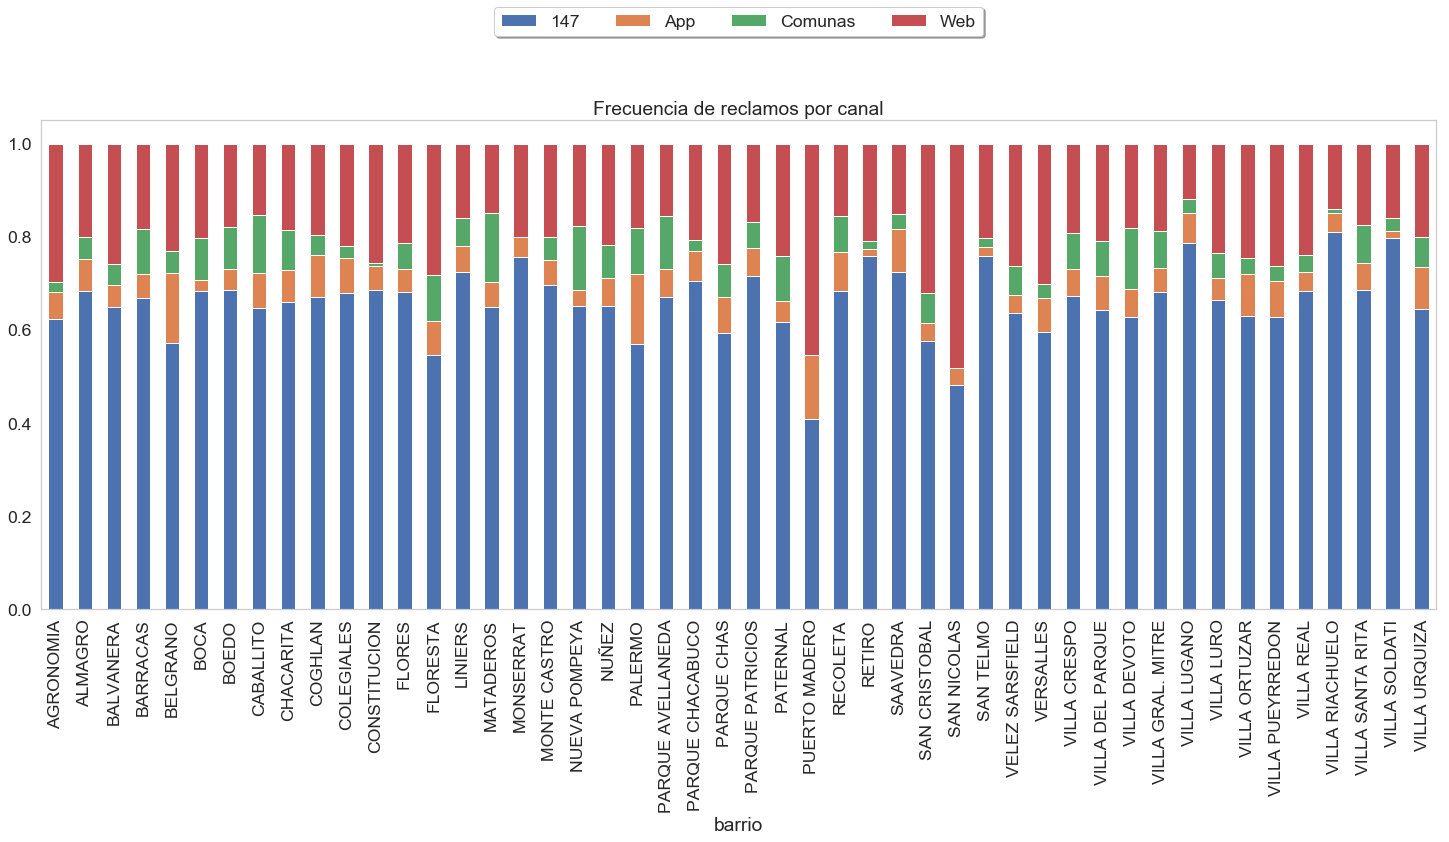

In [50]:
props = df_recl_arb.groupby("barrio")['canal'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', 
          title='Frecuencia de reclamos por canal',
          figsize=(25,10)
          )
ax = plt.subplot(111)

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          fancybox=True, shadow=True, ncol=5)

plt.show()



Reclamos por comuna

In [51]:
print("Las comunas y el número de reclamos:\n", df_recl_arb.comuna.value_counts(ascending=False))

Las comunas y el número de reclamos:
 11    4265
12    3616
10    3426
9     3378
15    3026
7     2885
13    2859
4     1998
14    1640
6     1497
8     1325
5     1179
3      826
2      504
1      385
Name: comuna, dtype: int64


Las comunas más arboladas son tambien las que más reclamos hacen.


Reclamos por calle

In [52]:
print("TOP 20 de calles con más reclamos:\n", df_recl_arb.calle.value_counts(ascending=False).head(20))

TOP 20 de calles con más reclamos:
 HELGUERA                   145
CONDARCO                   140
LASCANO                    139
GORDILLO, TIMOTEO          136
LAMARCA, EMILIO            132
GARCIA, JUAN AGUSTIN       132
MAGARIÑOS CERVANTES, A.    127
MONTIEL                    124
DEL LIBERTADOR AV.         120
CAMARONES                  120
SANTO TOME                 119
ARREGUI                    118
TERRADA                    116
ARGERICH                   115
CARACAS                    112
MORAN, PEDRO               111
ZAPIOLA                    110
BAHIA BLANCA               109
CAMPANA                    108
PAZ, GRAL. AV.             108
Name: calle, dtype: int64
